• DOMAIN: Semiconductor manufacturing process

• CONTEXT: A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine keyfactors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.

• DATA DESCRIPTION: sensor-data.csv : (1567, 592)

The data consists of 1567 datapoints each with 591 features.The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.

• PROJECT OBJECTIVE: We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the features are required to build the model or not.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Import and understand the data.

A. **Import** **‘signal-data.csv’ as DataFrame.**

In [ ]:
sdata = pd.read_csv("signal-data.csv")
rows, columns = sdata.shape
print('The dataset contains',rows, 'rows and',columns,'columns')
sdata.head()

The dataset contains 1567 rows and 592 columns


Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  Pass/Fail  
0     NaN     NaN     NaN       NaN         -1  
1  0.0096  0.0201  0.0060  208.2045         -1  
2  0.0584  0.0484  0.0148   82.8602          1  
3  0.0202  0.0149  0.0044   73.8432         -1  
4  0.0202  0.0149  0.0044   73.8432         -1  

[5 rows x 592 columns]

B. Print 5 point summary and share at least 2 observations.

In [ ]:
sdata.describe()

0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.237214     0.008961     0.073897     0.015116  ...   
min     100.0    82.131100     0.000000     1.191000    -0.053400  ...   
25%     100.0    97.920000     0.121100     1.411200    -0.010800  ...   
50%     100.0   101.512200     0.122400     1.461600    -0.001300  ...   
75%     100.0   104.586700     0.123800     1.516900     0.008400  ...   
max     100.0   129.252200     0.128600     1.656400     0.074900  ...   

              581          582          583          584          585  \
count  618.000000  1566.000000  1566.000000  1566.000000  1566.000000   
mean    97.934373     0.500096     0.015318     0.003847     3.067826   
std     87.520966     0.003404     0.017180     0.003720     3.578033   
min      0.000000     0.477800     0.006000     0.001700     1.197500   
25%     46.184900     0.497900     0.011600     0.003100     2.306500   
50%     72.288900     0.500200     0.013800     0.003600     2.757650   
75%    116.539150     0.502375     0.016500     0.004100     3.295175   
max    737.304800     0.509800     0.476600     0.104500    99.303200   

               586          587          588          589    Pass/Fail  
count  1566.000000  1566.000000  1566.000000  1566.000000  1567.000000  
mean      0.021458     0.016475     0.005283    99.670066    -0.867262  
std       0.012358     0.008808     0.002867    93.891919     0.498010  
min      -0.016900     0.003200     0.001000     0.000000    -1.000000  
25%       0.013425     0.010600     0.003300    44.368600    -1.000000  
50%       0.020500     0.014800     0.004600    71.900500    -1.000000  
75%       0.027600     0.020300     0.006400   114.749700    -1.000000  
max       0.102800     0.079900     0.028600   737.304800     1.000000  

[8 rows x 591 columns]

Observations

-Multiple columns with contant value/signal in all rows and can be dropped since the contribution is low or nil.

-Few columns also available with all the values as 0.

-Total number of rows for all the columns are not same and numbers differ.

Data cleansing:

A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.

In [ ]:
def missing(sdata):
    print (round((sdata.isnull().sum() * 100/ len(sdata)),2).sort_values(ascending=False))

missing(sdata)

158          91.19
292          91.19
293          91.19
157          91.19
85           85.58
             ...  
386           0.00
361           0.00
360           0.00
359           0.00
Pass/Fail     0.00
Length: 592, dtype: float64


In [ ]:
for col in sdata:
    if sdata[col].isnull().mean() > 0.20:
        sdata=sdata.drop(col,axis=1)
        
for i in sdata.columns[sdata.isnull().any(axis=0)]:
    sdata[i].fillna(sdata[i].mean(),inplace= True)   
sdata.shape

(1567, 560)

In [ ]:
pd.set_option("max_rows", None)
sdata.isnull().sum()

Time         0
0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
10           0
11           0
12           0
13           0
14           0
15           0
16           0
17           0
18           0
19           0
20           0
21           0
22           0
23           0
24           0
25           0
26           0
27           0
28           0
29           0
30           0
31           0
32           0
33           0
34           0
35           0
36           0
37           0
38           0
39           0
40           0
41           0
42           0
43           0
44           0
45           0
46           0
47           0
48           0
49           0
50           0
51           0
52           0
53           0
54           0
55           0
56           0
57           0
58           0
59           0
60           0
61           0
62           0
63           0
64           0
65        

Identify and drop the features which are having same value for all the rows.

In [ ]:
cols = sdata.select_dtypes([np.number]).columns
std = sdata[cols].std()
cols_to_drop = std[std==0].index
sdata.drop(cols_to_drop, axis=1,inplace=True)
sdata.shape

(1567, 444)

Drop other features if required using relevant functional knowledge. Clearly justify the same.

In [ ]:
pd.set_option("max_rows", None)
sdata.describe().T

count         mean          std         min         25%  \
0          1567.0  3014.452896    73.480613   2743.2400  2966.66500   
1          1567.0  2495.850231    80.227793   2158.7500  2452.88500   
2          1567.0  2200.547318    29.380932   2060.6600  2181.09995   
3          1567.0  1396.376627   439.712852      0.0000  1083.88580   
4          1567.0     4.197013    56.103066      0.6815     1.01770   
6          1567.0   101.112908     6.209271     82.1311    97.93780   
7          1567.0     0.121822     0.008936      0.0000     0.12110   
8          1567.0     1.462862     0.073849      1.1910     1.41125   
9          1567.0    -0.000841     0.015107     -0.0534    -0.01080   
10         1567.0     0.000146     0.009296     -0.0349    -0.00560   
11         1567.0     0.964353     0.012444      0.6554     0.95810   
12         1567.0   199.956809     3.255195    182.0940   198.13095   
14         1567.0     9.005371     2.793916      2.2493     7.09675   
15         1567.0   413.086035    17.204591    333.4486   406.13100   
16         1567.0     9.907603     2.401563      4.4696     9.56855   
17         1567.0     0.971444     0.012051      0.5794     0.96825   
18         1567.0   190.047354     2.778376    169.1774   188.30065   
19         1567.0    12.481034     0.217268      9.8773    12.46000   
20         1567.0     1.405054     0.016737      1.1797     1.39650   
21         1567.0 -5618.393610   626.421781  -7150.2500 -5932.62500   
22         1567.0  2699.378435   295.309778      0.0000  2578.12500   
23         1567.0 -3806.299734  1379.280537  -9986.7500 -4370.62500   
24         1567.0  -298.598136  2900.835956 -14804.5000 -1474.37500   
25         1567.0     1.203845     0.177487      0.0000     1.09490   
26         1567.0     1.938477     0.189374      0.0000     1.90675   
27         1567.0     6.638628     1.243454      0.0000     5.26735   
28         1567.0    69.499532     3.458970     59.4000    67.38335   
29         1567.0     2.366197     0.408433      0.6667     2.08890   
30         1567.0     0.184159     0.032923      0.0341     0.16180   
31         1567.0     3.673189     0.534980      2.0698     3.36270   
32         1567.0    85.337469     2.025902     83.1829    84.49050   
33         1567.0     8.960279     1.344027      7.6032     8.58000   
34         1567.0    50.582639     1.182241     49.8348    50.25290   
35         1567.0    64.555787     2.573926     63.6774    64.02480   
36         1567.0    49.417370     1.182241     40.2289    49.42050   
37         1567.0    66.221274     0.304044     64.9193    66.04080   
38         1567.0    86.836577     0.446613     84.7327    86.57830   
39         1567.0   118.679554     1.806644    111.7128   118.01560   
40         1567.0    67.904909    23.877841      1.4340    74.24000   
41         1567.0     3.353066     2.342268     -0.0759     2.69900   
43         1567.0   355.538904     6.232715    342.7545   350.80225   
44         1567.0    10.031165     0.174982      9.4640     9.92545   
45         1567.0   136.743060     7.846741    108.8464   130.73045   
46         1567.0   733.672811    12.166428    699.8139   724.44400   
47         1567.0     1.177958     0.189576      0.4967     0.98500   
48         1567.0   139.972231     4.522806    125.7982   136.93000   
50         1567.0   632.254197     8.641225    607.3927   625.92865   
51         1567.0   157.420991    60.905653     40.2614   115.53745   
53         1567.0     4.592971     0.054879      3.7060     4.57400   
54         1567.0     4.838523     0.059505      3.9320     4.81600   
55         1567.0  2856.172105    25.716411   2801.0000  2836.00000   
56         1567.0     0.928849     0.006799      0.8755     0.92550   
57         1567.0     0.949215     0.004171      0.9319     0.94670   
58         1567.0     4.593312     0.084986      4.2199     4.53190   
59         1567.0     2.960241     9.510891    -28.9882    -1.85545   
60         1567.0   355.159094     6

-We can use feature selection methods here however leaving the data as it is here since we still need to check multi-collinearity and then we will drop the correlated features

The features have already reduced by almost over 100 and will be reduced further after dropping correlated variables

-Also, we will do dimensionality reduction techniques on later stages during model building anyways.


Check for multi-collinearity in the data and take necessary action

In [ ]:
corr=sdata.corr()
corr

0         1         2         3         4         6  \
0          1.000000 -0.143840  0.004756 -0.007613 -0.011014  0.002270   
1         -0.143840  1.000000  0.005767 -0.007568 -0.001636 -0.025564   
2          0.004756  0.005767  1.000000  0.298935  0.095891 -0.136225   
3         -0.007613 -0.007568  0.298935  1.000000 -0.058483 -0.685835   
4         -0.011014 -0.001636  0.095891 -0.058483  1.000000 -0.074368   
6          0.002270 -0.025564 -0.136225 -0.685835 -0.074368  1.000000   
7          0.031483 -0.012037 -0.146213  0.073856 -0.347734  0.013169   
8         -0.052622  0.031258  0.023528 -0.102892 -0.025946  0.087788   
9          0.009045  0.023964  0.016168  0.068215  0.054206 -0.049389   
10         0.006504  0.009645  0.069893  0.049873 -0.006470 -0.005354   
11         0.043533 -0.026883  0.036318  0.040453 -0.000985 -0.017959   
12         0.010368  0.034062  0.018326 -0.028223 -0.002707  0.058982   
14        -0.007058 -0.037667  0.006476 -0.019827 -0.017523  0.055333   
15         0.030675 -0.087315  0.006115 -0.013157  0.011435  0.039815   
16        -0.005749 -0.001878 -0.000788 -0.004596 -0.001763  0.040015   
17         0.012620 -0.009803 -0.004912  0.042635  0.000284 -0.012526   
18         0.017691  0.042938  0.021878 -0.028618 -0.001610  0.033196   
19        -0.009036 -0.003213 -0.026451  0.036348  0.006466 -0.005550   
20         0.025818  0.032650  0.015444  0.037888  0.012803 -0.035126   
21        -0.011075  0.058155  0.044468  0.021111  0.008353 -0.021131   
22         0.032206 -0.052664 -0.029830 -0.033141 -0.007773  0.035590   
23        -0.046678 -0.016047  0.009276 -0.007973  0.004969  0.013043   
24        -0.014921 -0.060066 -0.021149 -0.049605 -0.013636  0.057480   
25         0.108635  0.004635 -0.026458  0.079637  0.028258 -0.098125   
26         0.093011 -0.024061 -0.027573  0.036169  0.011100 -0.046931   
27         0.107679  0.003650 -0.025743  0.085251  0.028637 -0.104848   
28         0.054548 -0.022847 -0.061725  0.096876  0.007753 -0.107400   
29        -0.030896  0.001671  0.049753 -0.013283 -0.012849  0.053750   
30        -0.039582  0.052063  0.062082  0.001712  0.001933  0.028572   
31        -0.056821 -0.051384 -0.007405 -0.108653 -0.035248  0.115955   
32        -0.004650 -0.044623 -0.023347 -0.020645 -0.005507  0.005285   
33        -0.034059 -0.021570 -0.042929 -0.041229  0.012196  0.002817   
34        -0.017681 -0.060583  0.004000 -0.006226  0.002127 -0.010034   
35        -0.004547 -0.065775  0.015164  0.055817 -0.006195 -0.062206   
36         0.017681  0.060583 -0.004001  0.006227 -0.002127  0.010034   
37        -0.035548 -0.008560 -0.003199 -0.000772  0.005146 -0.037410   
38        -0.042198  0.008527 -0.008906 -0.053804 -0.016017  0.034973   
39        -0.034930 -0.055905 -0.004717  0.021345  0.011918  0.006100   
40        -0.009150  0.027101 -0.014761 -0.006463  0.025844  0.014575   
41         0.041140 -0.017391 -0.014557 -0.020289 -0.012742 -0.009615   
43        -0.050244 -0.019848  0.050536 -0.023326 -0.012074  0.011003   
44         0.053808  0.005980 -0.092003  0.065293 -0.009117 -0.065022   
45         0.015586  0.017935  0.005874 -0.031329  0.057947  0.029945   
46        -0.006066  0.007923  0.010206 -0.043089  0.047234  0.030622   
47        -0.037736  0.019267 -0.041351  0.000146  0.003078  0.005130   
48         0.004240  0.005573 -0.096163 -0.021524 -0.028014  0.026156   
50        -0.019867  0.004888 -0.008547 -0.056539  0.029248  0.048818   
51        -0.050817  0.022586 -0.016448 -0.012499  0.006774  0.053057   
53         0.014760 -0.034800 -0.000998 -0.049682  0.031237  0.027089   
54         0.022427 -0.047012  0.015755 -0.047134  0.029856  0.013901   
55        -0.024957  0.017092 -0.008088 -0.016235 -0.052408  0.013190   
56         0.015580  0.000832 -0.018348 -0.028157 -0.033152  0.029667   
57        -0.021475  0.037399 -0.046623 -0.003676  0.002063  0.034718   
58        -0.012668 -0.025576  0.014534  0.032462 -0.023853 -0.051542   
59 

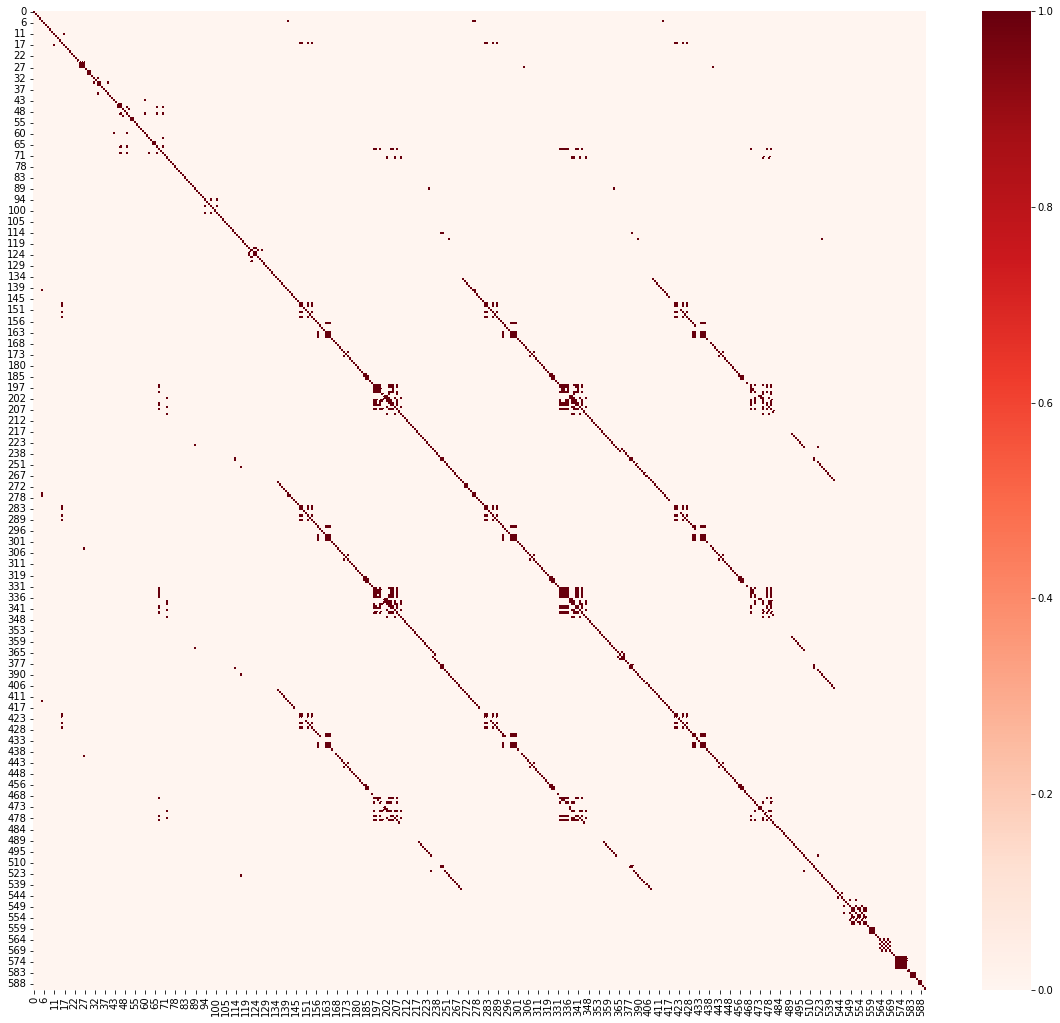

In [ ]:
plt.figure(figsize=(20,18))
sns.heatmap(abs(corr>0.7),cmap="Reds");

In [ ]:
# Create correlation matrix
corr_matrix = sdata.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

# Drop features 
sdata.drop(to_drop, axis=1, inplace=True)

In [ ]:
row,column=sdata.shape
print('After dropping the correlated variables the dataset contains', row, 'rows and', column, 'columns')

After dropping the correlated variables the dataset contains 1567 rows and 203 columns


Make all relevant modifications on the data using both functional/logical reasoning/assumptions.

Checking for outliers in the variables

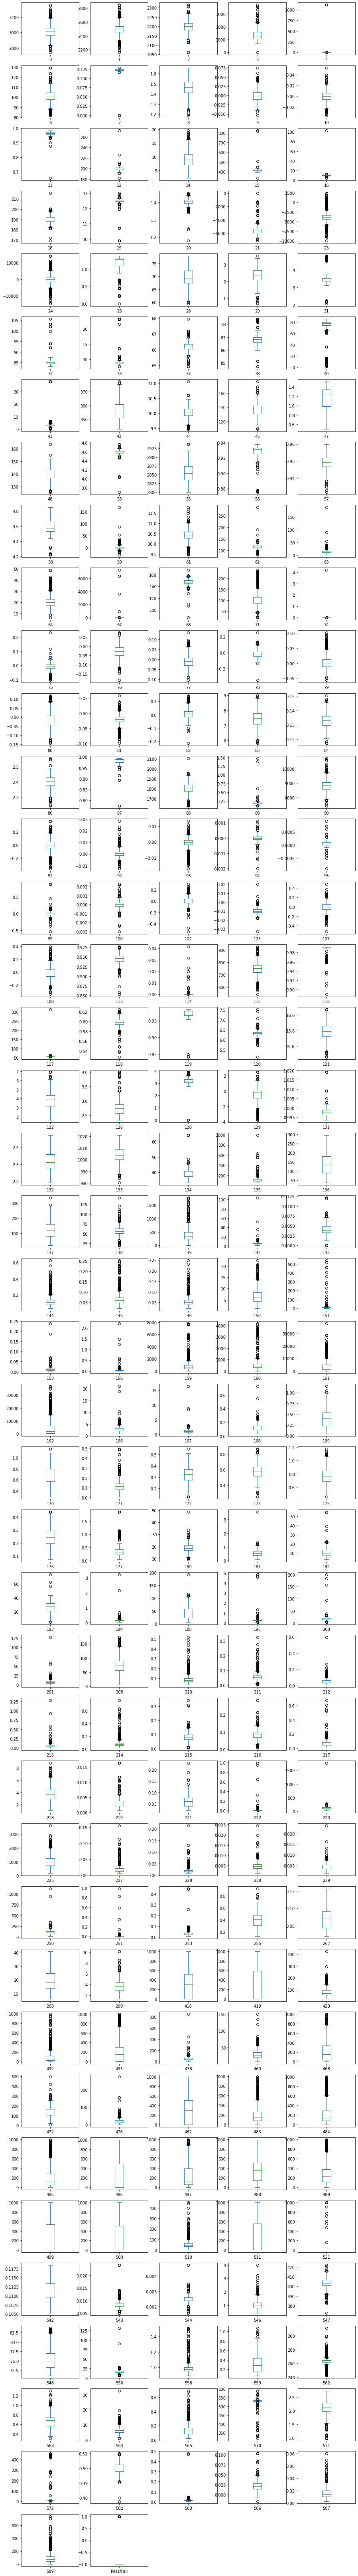

In [ ]:
sdata.plot(kind='box', subplots=True,layout=(52,5), fontsize=10, figsize=(15,150));

Based on above plot we can see presence of outlisers in almost every independent varibale.

We will deal with the outliers by replacing them with the median

In [ ]:
sdata_c = sdata.copy()
sdata_c.drop(['Pass/Fail','Time'], axis=1,inplace=True)

In [ ]:
for i in sdata_c.columns:
    q1 = sdata_c[i].quantile(0.25)
    q3 = sdata_c[i].quantile(0.75)
    iqr = q3 - q1
    
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    
    sdata_c.loc[(sdata_c[i] < low) | (sdata_c[i] > high), i] = sdata_c[i].median()

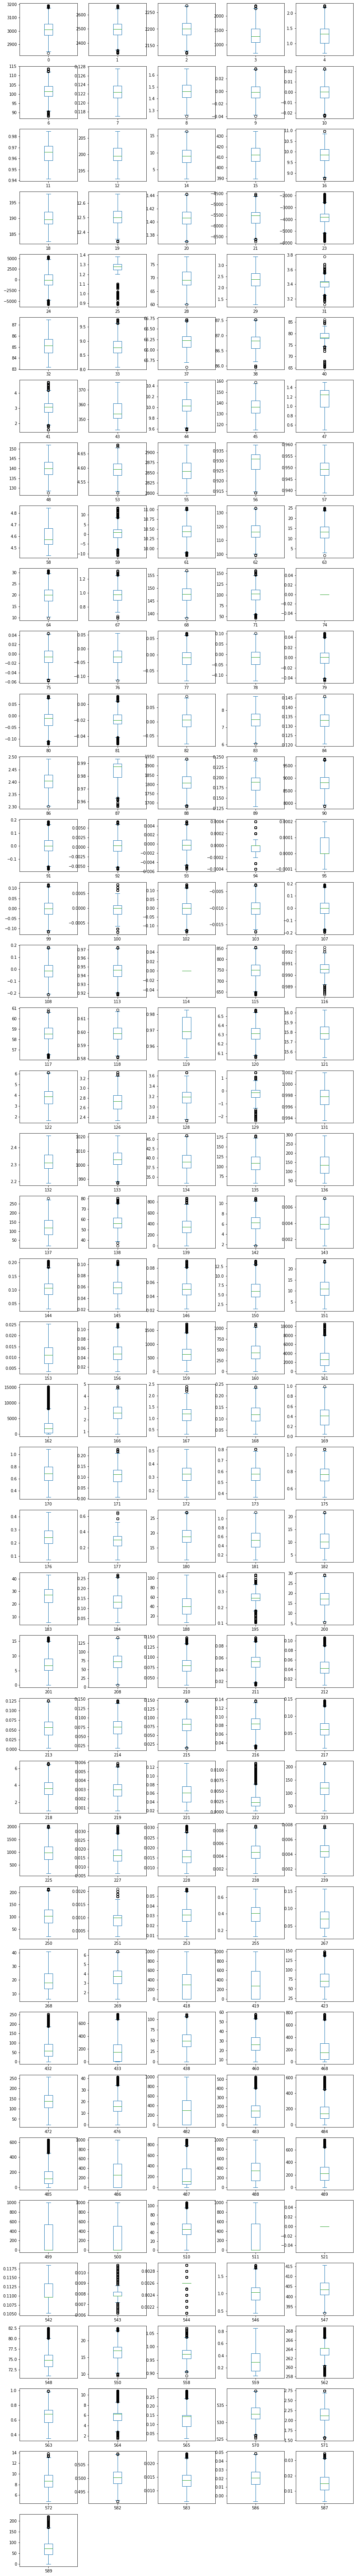

In [ ]:
sdata_c.plot(kind='box', subplots=True,layout=(52,5), fontsize=10, figsize=(15,150));

Most of the outliers have been resolved,those indicated as outliers now are the new ones that have emerged due to manipulation

In [ ]:
#combining the data

Y=sdata['Pass/Fail']
sdata1=pd.concat([sdata_c,Y],axis=1)

In [ ]:
sdata1.head()

0        1          2          3       4         6       7       8  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242  1.5005   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247  1.4966   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241  1.4436   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217  1.4882   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235  1.5031   

        9      10  ...      565       570     571    572     582     583  \
0  0.0162 -0.0034  ...  0.14561  533.8500  2.1113   8.95  0.5005  0.0118   
1 -0.0005 -0.0148  ...  0.14561  535.0164  2.4335   5.92  0.5019  0.0223   
2  0.0041  0.0013  ...  0.14280  535.0245  2.0293  11.21  0.4958  0.0157   
3 -0.0124 -0.0033  ...  0.16300  530.5682  2.0253   9.33  0.4990  0.0103   
4 -0.0031 -0.0072  ...  0.14561  532.0155  2.0275   8.83  0.5002  0.0138   

        586       587         589  Pass/Fail  
0  0.021458  0.016475   99.670066         -1  
1  0.009600  0.020100  208.204500         -1  
2  0.020500  0.014800   82.860200          1  
3  0.020200  0.014900   73.843200         -1  
4  0.020200  0.014900   73.843200         -1  

[5 rows x 202 columns]

In [ ]:
sdata1['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

The target class is imbalanced and needs to be delat with but we will do it later in coming steps

In the data cleaning process we have dealt with:

-missing/null values

-Features with constant/same values in all rows

-Multi-collinearity

-Outliers

Any further feature selection or diamensionality reduction can be done later during model building

**Data analysis & visualisation:**

**A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.**

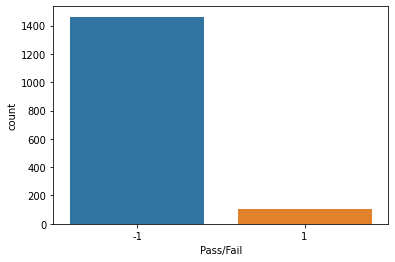

In [ ]:
sns.countplot(data= sdata1, x= sdata1['Pass/Fail']);

Heavy imbalance in the data. The data is baised towards the pass category.


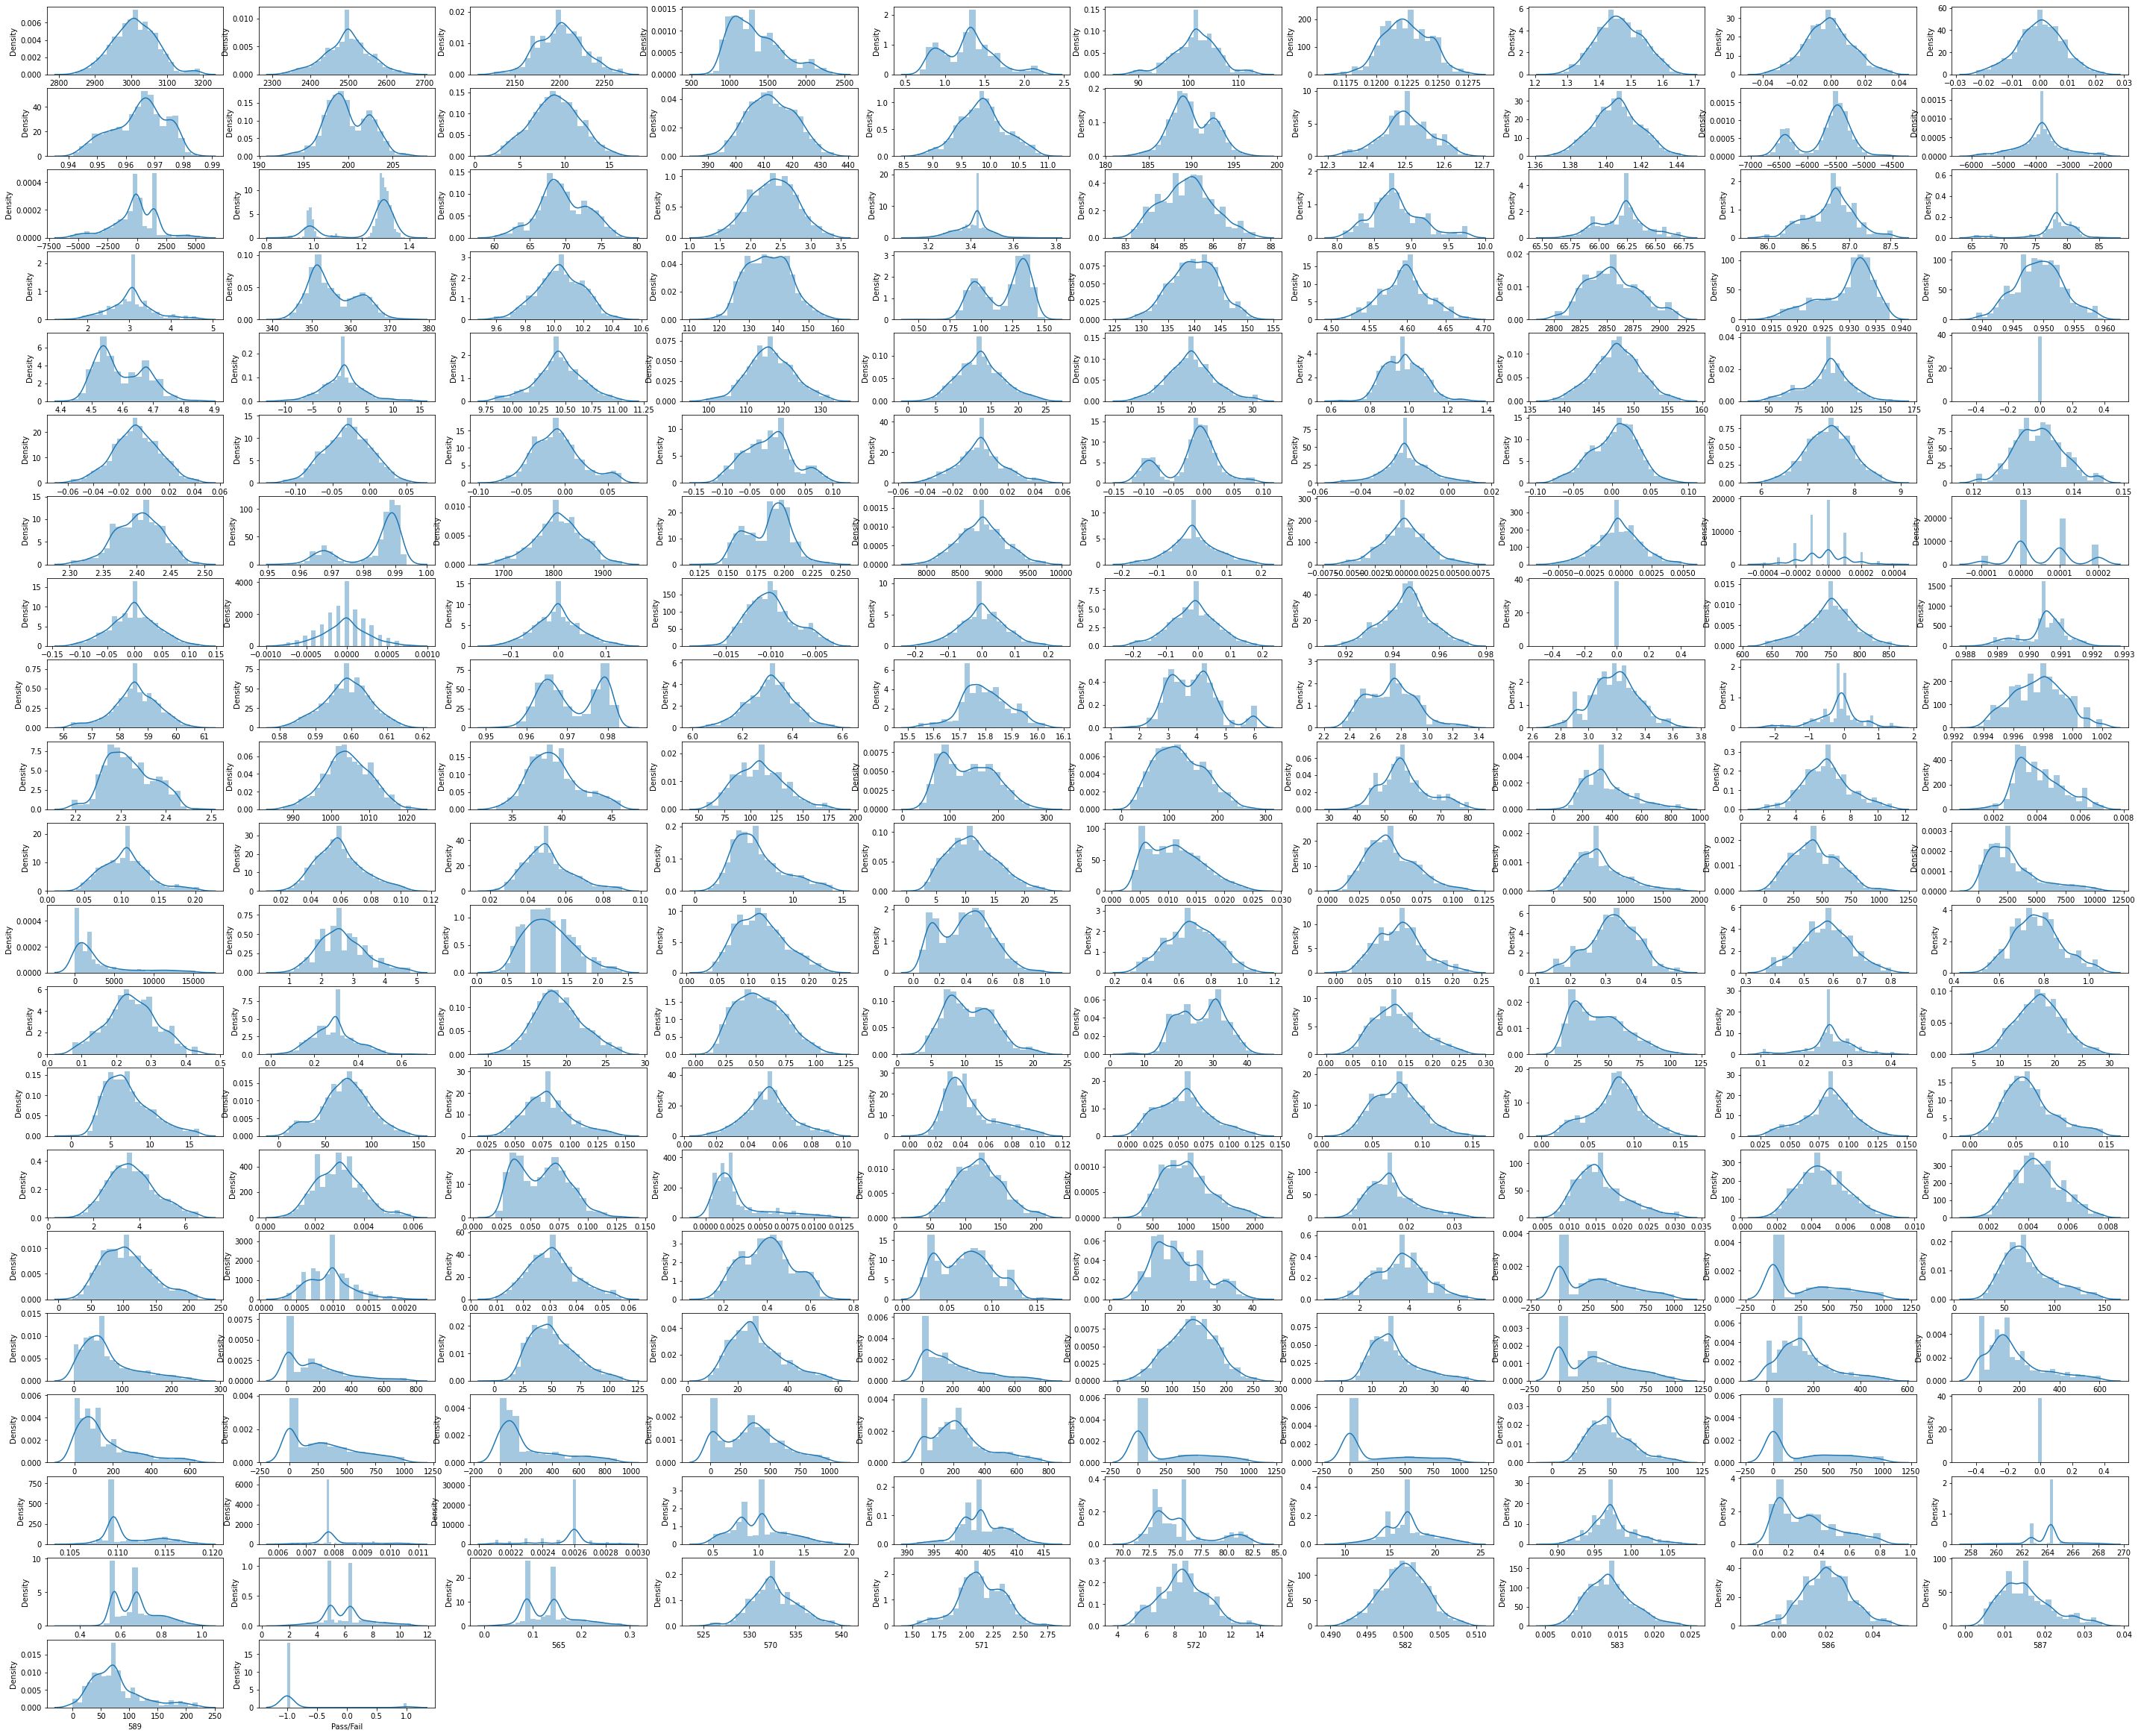

In [ ]:
plt.figure(figsize=(50, 50))
col = 1
for i in sdata1.columns:
    plt.subplot(25, 10, col)
    sns.distplot(sdata1[i])
    col += 1

Most of the features seem to have a normal distribution except for selected few

Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis

In [ ]:
z = sdata['Time']
sdata1=pd.concat([sdata1,z],axis=1)

In [ ]:
sdata1['year'] = pd.DatetimeIndex(sdata1['Time']).year
sdata1['month'] = pd.DatetimeIndex(sdata1['Time']).month

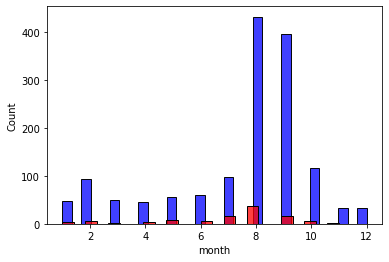

In [ ]:
sns.histplot( sdata1[sdata1['Pass/Fail'] == -1]['month'], color = 'b');
sns.histplot( sdata1[sdata1['Pass/Fail'] == 1]['month'], color = 'r');

**-Failures are high around August and September and the pass values is also high around the same months**

**-Failures are low October onwards as per the distribution above**

In [ ]:
corr1=sdata1.corr()
corr1

0         1         2         3         4         6  \
0          1.000000 -0.161977 -0.002105  0.009080 -0.030292 -0.005125   
1         -0.161977  1.000000  0.015250 -0.015721  0.024061  0.009087   
2         -0.002105  0.015250  1.000000  0.437378  0.137439 -0.193572   
3          0.009080 -0.015721  0.437378  1.000000  0.242347 -0.501057   
4         -0.030292  0.024061  0.137439  0.242347  1.000000 -0.198187   
6         -0.005125  0.009087 -0.193572 -0.501057 -0.198187  1.000000   
7         -0.006418  0.002934 -0.453115  0.136314  0.147162  0.050802   
8         -0.062625  0.029195  0.040006 -0.000771 -0.010941  0.083524   
9          0.023282  0.027247  0.028621  0.063287  0.016929 -0.077769   
10         0.004916  0.004842  0.051440 -0.002583 -0.015895  0.030255   
11         0.050626 -0.037813  0.044988  0.012557 -0.005240 -0.043900   
12         0.007824  0.051257 -0.000643 -0.010755 -0.053210  0.084319   
14         0.009326 -0.044869 -0.007167 -0.090152  0.009632  0.071598   
15        -0.023236 -0.047011  0.001873 -0.069626 -0.001453  0.038228   
16        -0.018557 -0.016556 -0.076997 -0.056441 -0.020198  0.054411   
18         0.016611  0.046836  0.013216  0.003402 -0.046086  0.071652   
19        -0.034982  0.009199 -0.031396  0.010739  0.021261 -0.033495   
20         0.012884  0.013903  0.007609  0.028263  0.007988 -0.023104   
21        -0.000511  0.040716  0.021167  0.019756  0.007245 -0.071053   
23        -0.034178  0.008831  0.056541  0.016423  0.052179 -0.018176   
24        -0.005920 -0.048593  0.007419 -0.041067 -0.069342  0.050592   
25         0.035082  0.045575 -0.002890  0.032307  0.025381 -0.094206   
28         0.036430 -0.009927 -0.036847  0.037337  0.068845 -0.097462   
29        -0.024034 -0.007658  0.040036  0.011616 -0.003133  0.061184   
31        -0.026474  0.011510 -0.010235 -0.039245 -0.013992  0.080030   
32         0.059608 -0.049206  0.022140  0.036312  0.023016  0.031330   
33         0.002627  0.023796  0.041061 -0.016081 -0.028650 -0.017507   
37        -0.044260  0.004861  0.037029  0.009304 -0.012726 -0.014232   
38         0.002568 -0.027814 -0.028343  0.012212 -0.032166  0.037755   
40         0.011461 -0.029741 -0.024956  0.018326  0.053967 -0.070602   
41         0.006500 -0.004759 -0.060200  0.031034 -0.052782  0.005750   
43        -0.055284  0.004722  0.062060 -0.055396  0.027434  0.033979   
44         0.034091  0.012767 -0.091119  0.007034  0.018038 -0.058022   
45        -0.009302 -0.002711  0.000094 -0.042060  0.022417 -0.002233   
47        -0.024911  0.034063 -0.034777  0.020557  0.004871  0.003895   
48         0.018688  0.013052 -0.080985 -0.014945 -0.030520  0.024843   
53        -0.015179 -0.029727  0.018550 -0.038695 -0.007905  0.045649   
55        -0.024597  0.023254 -0.009695 -0.051266  0.013872 -0.005795   
56         0.005899 -0.015869 -0.024086  0.046665 -0.042254  0.016160   
57        -0.049872  0.043538 -0.038722 -0.018207 -0.036511  0.044625   
58        -0.008646 -0.029213  0.022111  0.079924 -0.046156 -0.069946   
59        -0.072605  0.010461 -0.022787 -0.015859 -0.029191  0.035405   
61        -0.004145  0.030659 -0.014280  0.009769  0.009051 -0.019652   
62        -0.004507 -0.019189 -0.016339 -0.051281  0.034598  0.013633   
63        -0.020099  0.045559 -0.051702 -0.012385 -0.020363  0.053202   
64         0.030058  0.016262  0.006594 -0.009565  0.000659 -0.017342   
67         0.033757 -0.005291 -0.034184  0.004208 -0.041073  0.070860   
68         0.039469 -0.001097 -0.030669 -0.015996  0.003357 -0.057982   
71        -0.012259 -0.009930  0.012602  0.062828  0.034054 -0.104625   
74              NaN       NaN       NaN       NaN       NaN       NaN   
75         0.045353 -0.039347  0.000287  0.022169 -0.027115 -0.037947   
76         0.012041 -0.039007 -0.008030  0.032016  0.021798 -0.091692   
77        -0.005087 -0.023854 -0.020106  0.017633 -0.004509  0.030386   
78         0.033578  0.000759  0.038134  0.141664  0.019134 -0.192684   
79 

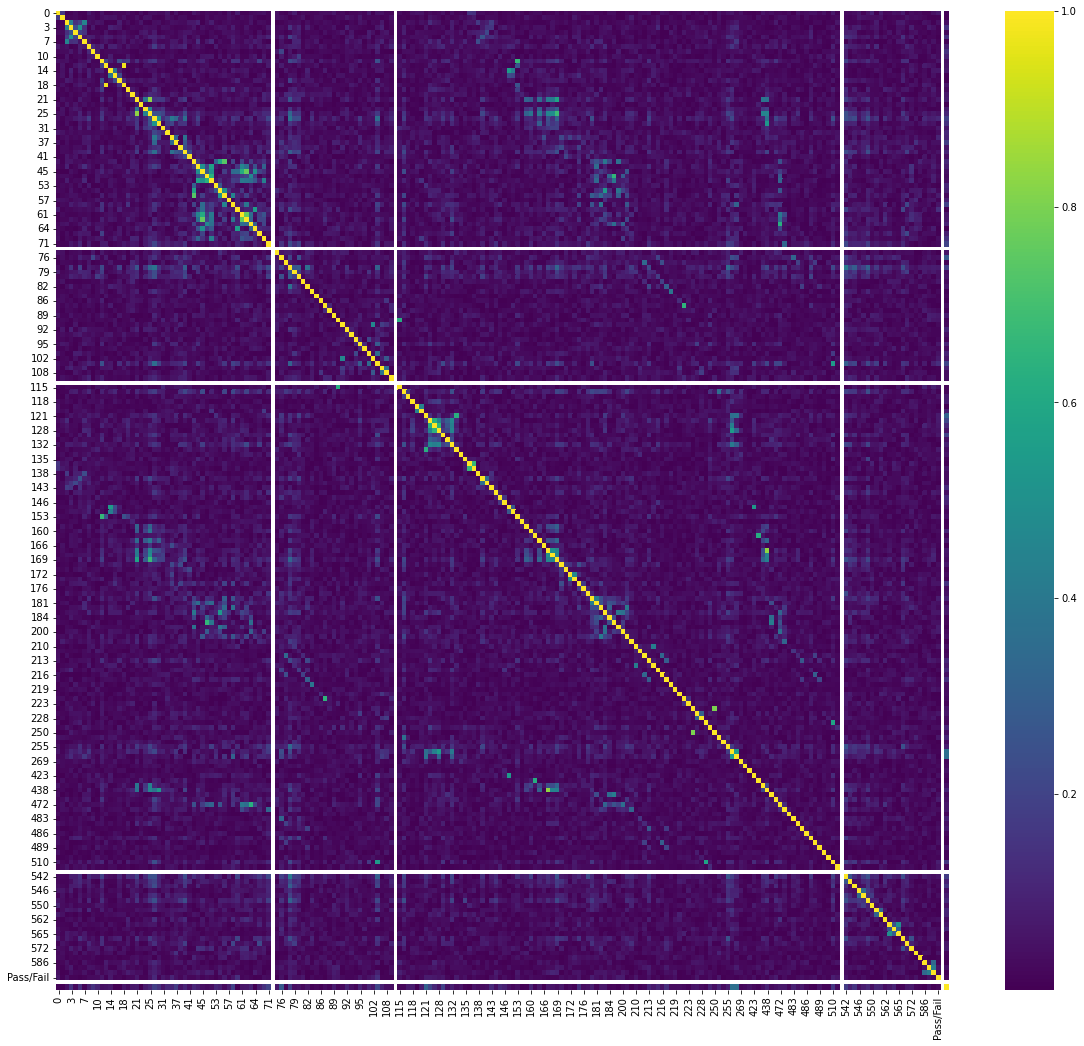

In [ ]:
plt.figure(figsize=(20,18))
sns.heatmap(abs(corr1),cmap="viridis");

There are few features with a bit high correlation like 452 and 255

**Data pre-processing:**

**Segregate predictors vs target attributes**

In [ ]:
sdata1.drop(['Time','year','month'], axis= 1, inplace= True)

In [ ]:
sdata1 = sdata1.T.reset_index(drop=True).T
sdata1

0            1            2            3       4           5    \
0     3030.930000  2564.000000  2187.733300  1411.126500  1.3602   97.613300   
1     3095.780000  2465.140000  2230.422200  1463.660600  0.8294  102.343300   
2     2932.610000  2559.940000  2186.411100  1698.017200  1.5102   95.487800   
3     2988.720000  2479.900000  2199.033300   909.792600  1.3204  104.236700   
4     3032.240000  2502.870000  2233.366700  1326.520000  1.5334  100.396700   
5     2946.250000  2432.840000  2233.366700  1326.520000  1.5334  100.396700   
6     3030.270000  2430.120000  2230.422200  1463.660600  0.8294  102.343300   
7     3058.880000  2498.910000  2248.900000  1004.469200  0.7884  106.240000   
8     2967.680000  2600.470000  2248.900000  1004.469200  0.7884  106.240000   
9     3016.110000  2428.370000  2248.900000  1004.469200  0.7884  106.240000   
10    2994.050000  2548.210000  2195.122200  1046.146800  1.3204  103.340000   
11    2928.840000  2479.400000  2196.211100  1605.757800  0.9959   97.915600   
12    2920.070000  2507.400000  2195.122200  1046.146800  1.3204  103.340000   
13    3051.440000  2529.270000  2184.433300   877.626600  1.4668  107.871100   
14    2963.970000  2629.480000  2224.622200   947.773900  1.2924  104.848900   
15    2988.310000  2546.260000  2224.622200   947.773900  1.2924  104.848900   
16    3028.020000  2560.870000  2270.255600  1258.455800  1.3950  104.807800   
17    3032.730000  2517.790000  2270.255600  1258.455800  1.3950  104.807800   
18    3040.340000  2501.160000  2207.388900   962.531700  1.2043  104.031100   
19    2988.300000  2519.050000  2208.855600  1157.722400  1.5509  107.802200   
20    2987.320000  2528.810000  2200.547318  1396.376627  1.3171  101.112908   
21    3014.452896  2481.850000  2207.388900   962.531700  1.2043  104.031100   
22    3002.270000  2497.450000  2207.388900   962.531700  1.2043  104.031100   
23    2884.740000  2514.540000  2160.366700   899.948800  1.4022  105.497800   
24    3010.410000  2632.800000  2203.900000  1116.412900  1.2639  102.273300   
25    2979.740000  2446.560000  2257.166700  1437.956500  1.4918  106.340000   
26    3067.350000  2456.330000  2257.166700  1437.956500  1.4918  106.340000   
27    2988.990000  2607.630000  2223.033300  1533.993400  1.3548  109.706700   
28    2972.780000  2431.570000  2190.488900  1059.439000  0.8614  102.117800   
29    2981.850000  2529.110000  2180.377800  1208.741100  1.2998  100.278900   
30    2975.880000  2489.700000  2191.666700  1153.901100  1.2569  100.676700   
31    3058.610000  2492.360000  2180.377800  1208.741100  1.2998  100.278900   
32    3047.190000  2524.180000  2197.311100   969.891000  1.3015  105.391100   
33    2981.310000  2566.350000  2197.311100   969.891000  1.3015  105.391100   
34    2963.830000  2457.640000  2225.177700  1457.793400  1.2414  110.278900   
35    3040.720000  2477.350000  2191.666700  1153.901100  1.2569  100.676700   
36    2989.470000  2445.440000  2223.166700  1522.553500  1.1981  110.633300   
37    2981.540000  2498.910000  2221.844500  1416.821100  1.1758  111.627800   
38    2958.090000  2542.240000  2222.677800  1547.612500  1.4431  110.564400   
39    3017.210000  2530.670000  2169.466700  1185.444900  1.2412  100.844400   
40    2962.140000  2545.710000  2221.577800  1503.623000  1.1878  111.344400   
41    3017.100000  2517.180000  2180.377800  1208.741100  1.2998  100.278900   
42    3021.260000  2503.460000  2180.377800  1208.741100  1.2998  100.278900   
43    3000.360000  2498.910000  2174.866600  1039.229100  1.0455  103.600000   
44    3047.780000  2490.710000  2166.522200   907.074600  1.0647  104.521100   
45    2912.870000  2446.250000  2166.522200   907.074600  1.0647  104.521100   
46    3076.380000  2475.530000  2166.522200   907.074600  1.0647  104.521100   
47    3055.970000  2498.910000  2166.522200   907.074600  1.0647  104.521100   
48    2993.590000  2345.950000  2169.466700  1185.444900  1.2412  100.844400   
49    2946.860

**Target varibale name is changed due to resetting of column indexes, renaming it to Pass/Fail again**

In [ ]:
sdata1.rename(columns= {201: 'Pass/Fail'}, inplace= True) 

In [ ]:
sdata1.head()

0        1          2          3       4         5       6       7  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242  1.5005   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247  1.4966   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241  1.4436   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217  1.4882   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235  1.5031   

        8       9  ...      192       193     194    195     196     197  \
0  0.0162 -0.0034  ...  0.14561  533.8500  2.1113   8.95  0.5005  0.0118   
1 -0.0005 -0.0148  ...  0.14561  535.0164  2.4335   5.92  0.5019  0.0223   
2  0.0041  0.0013  ...  0.14280  535.0245  2.0293  11.21  0.4958  0.0157   
3 -0.0124 -0.0033  ...  0.16300  530.5682  2.0253   9.33  0.4990  0.0103   
4 -0.0031 -0.0072  ...  0.14561  532.0155  2.0275   8.83  0.5002  0.0138   

        198       199         200  Pass/Fail  
0  0.021458  0.016475   99.670066       -1.0  
1  0.009600  0.020100  208.204500       -1.0  
2  0.020500  0.014800   82.860200        1.0  
3  0.020200  0.014900   73.843200       -1.0  
4  0.020200  0.014900   73.843200       -1.0  

[5 rows x 202 columns]

In [ ]:
X = sdata1.drop(['Pass/Fail'], axis = 1)
y = sdata1['Pass/Fail']

In [ ]:
X.head()

0        1          2          3       4         5       6       7    \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242  1.5005   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247  1.4966   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241  1.4436   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217  1.4882   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235  1.5031   

      8       9    ...       191      192       193     194    195     196  \
0  0.0162 -0.0034  ...  6.444985  0.14561  533.8500  2.1113   8.95  0.5005   
1 -0.0005 -0.0148  ...  6.444985  0.14561  535.0164  2.4335   5.92  0.5019   
2  0.0041  0.0013  ...  6.290000  0.14280  535.0245  2.0293  11.21  0.4958   
3 -0.0124 -0.0033  ...  7.320000  0.16300  530.5682  2.0253   9.33  0.4990   
4 -0.0031 -0.0072  ...  6.444985  0.14561  532.0155  2.0275   8.83  0.5002   

      197       198       199         200  
0  0.0118  0.021458  0.016475   99.670066  
1  0.0223  0.009600  0.020100  208.204500  
2  0.0157  0.020500  0.014800   82.860200  
3  0.0103  0.020200  0.014900   73.843200  
4  0.0138  0.020200  0.014900   73.843200  

[5 rows x 201 columns]

In [ ]:
y.head()

0   -1.0
1   -1.0
2    1.0
3   -1.0
4   -1.0
Name: Pass/Fail, dtype: float64

**Check for target balancing and fix it if found imbalanced**

In [ ]:
 y.value_counts()

-1.0    1463
 1.0     104
Name: Pass/Fail, dtype: int64

The data is imbalanced as we have checked and identified in previous steps. The data is biased towards the Pass category. We will use random oversampling technique



In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()
X_res, y_res = oversample.fit_resample(X, y)

In [ ]:
y_res.value_counts()

-1.0    1463
 1.0    1463
Name: Pass/Fail, dtype: int64

In [ ]:
print("After UpSampling, counts of label '-1': {}".format(sum(y_res== -1)))
print("After UpSampling, counts of label '1': {} \n".format(sum(y_res== 1)))



print('After UpSampling, the shape of X_res: {}'.format(X_res.shape))
print('After UpSampling, the shape of y_res: {} \n'.format(y_res.shape))

After UpSampling, counts of label '-1': 1463
After UpSampling, counts of label '1': 1463 

After UpSampling, the shape of X_res: (2926, 201)
After UpSampling, the shape of y_res: (2926,) 



**Perform train-test split and standardise the data or vice versa if required**


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X_res, y_res,  test_size= 0.20, random_state= 2)  


In [ ]:
scaler = StandardScaler()

Scaled_X_train = scaler.fit_transform(X_train)
Scaled_X_train.shape

(2340, 201)

In [ ]:
Scaled_X_test = scaler.fit_transform(X_test)
Scaled_X_test.shape

(586, 201)

**Check if the train and test data have similar statistical characteristics when compared with original data.**



In [ ]:
X.describe().T

count         mean          std        min          25%          50%  \
0    1567.0  3010.002449    61.721903  2831.9100  2968.195000  3011.840000   
1    1567.0  2496.985253    59.577861  2326.5900  2459.870000  2498.910000   
2    1567.0  2201.001188    25.681452  2126.6555  2183.055600  2200.955600   
3    1567.0  1345.707557   334.300811   711.0258  1084.377900  1287.353800   
4    1567.0     1.296507     0.333287     0.6815     1.017700     1.317100   
5    1567.0   101.428935     4.466126    88.0911    98.805600   101.492200   
6    1567.0     0.122455     0.001881     0.1171     0.121100     0.122400   
7    1567.0     1.463768     0.072346     1.2532     1.411650     1.461600   
8    1567.0    -0.001384     0.013846    -0.0393    -0.010650    -0.001300   
9    1567.0     0.000149     0.008298    -0.0228    -0.005250     0.000400   
10   1567.0     0.964750     0.009134     0.9416     0.958300     0.965800   
11   1567.0   199.895039     2.482978   192.5209   198.146200   199.537100   
12   1567.0     8.943571     2.693693     2.2493     7.096750     8.973900   
13   1567.0   412.488580     8.454369   389.4671   406.138050   412.262900   
14   1567.0     9.862549     0.410041     8.7404     9.592050     9.852000   
15   1567.0   190.044686     2.522939   182.5944   188.324450   189.675700   
16   1567.0    12.501824     0.063653    12.3351    12.464700    12.499600   
17   1567.0     1.405865     0.013338     1.3701     1.397000     1.406000   
18   1567.0 -5665.417382   443.409707 -6736.0000 -5873.000000 -5523.250000   
19   1567.0 -3850.505062   723.913489 -5866.0000 -4189.375000 -3819.750000   
20   1567.0  -202.348987  1857.241923 -5718.5000 -1144.000000   -80.500000   
21   1567.0     1.223995     0.131257     0.8902     1.248300     1.283000   
22   1567.0    69.535043     3.407205    60.1111    67.405550    69.155600   
23   1567.0     2.374933     0.389814     1.2667     2.088900     2.377800   
24   1567.0     3.406542     0.074917     3.1270     3.363150     3.431400   
25   1567.0    85.114578     0.896313    83.1829    84.490500    85.140400   
26   1567.0     8.801163     0.344924     8.0787     8.580050     8.770000   
27   1567.0    66.209168     0.204526    65.5921    66.070100    66.231400   
28   1567.0    86.774867     0.286822    85.9594    86.580800    86.820700   
29   1567.0    78.300675     3.179451    65.3400    77.840000    78.270000   
30   1567.0     3.044704     0.530738     1.5820     2.743000     3.080000   
31   1567.0   355.495086     6.164386   342.7545   350.802250   353.727300   
32   1567.0    10.038612     0.157380     9.5859     9.934800    10.034700   
33   1567.0   136.607621     7.455240   115.2955   130.760950   136.416400   
34   1567.0     1.177958     0.189576     0.4967     0.985000     1.250600   
35   1567.0   139.991673     4.400788   127.6718   136.992750   140.005500   
36   1567.0     4.596534     0.030795     4.5130     4.575000     4.596000   
37   1567.0  2855.910458    25.316673  2801.0000  2836.000000  2854.000000   
38   1567.0     0.929375     0.005254     0.9142     0.925700     0.931000   
39   1567.0     0.949357     0.003937     0.9391     0.946700     0.949300   
40   1567.0     4.595859     0.079085     4.4350     4.532400     4.572700   
41   1567.0     0.597040     3.764534   -10.8745    -1.652250     0.973600   
42   1567.0    10.438601     0.225672     9.8279    10.308000    10.434600   
43   1567.0   116.530422     6.174482    99.0464   112.365000   116.236400   
44   1567.0    13.235233     4.078359     1.6591    10.383650    13.262700   
45   1567.0    19.964308     3.823957     9.7645    17.400000    20.044500   
46   1567.0     0.974470     0.099868     0.6366     0.898350     0.978600   
47   1567.0   147.584797     3.417199   138.2755   145.309100   147.592700   
48   1567.0    99.569438    19.628579    45.8924    88.660700   102.651200   
49   1567.0     0.000000     0.000000     0.0000     0.000000     0.000000   
50   1567.0    -0.005898    

In [ ]:
X_test.describe().T

count         mean          std        min          25%          50%  \
0    586.0  3003.439659    66.809497  2848.4600  2960.075000  2994.430000   
1    586.0  2496.698260    60.137748  2335.0600  2463.110000  2498.910000   
2    586.0  2200.585936    25.754044  2126.6555  2181.269450  2200.955600   
3    586.0  1357.857247   326.044896   847.7976  1089.365500  1287.353800   
4    586.0     1.286786     0.309814     0.6815     1.047075     1.301200   
5    586.0   101.249756     4.246817    89.7222    98.901675   101.433300   
6    586.0     0.122348     0.001854     0.1171     0.121100     0.122200   
7    586.0     1.466143     0.065374     1.2956     1.421075     1.466300   
8    586.0    -0.001484     0.013811    -0.0368    -0.009300    -0.001100   
9    586.0     0.000433     0.008189    -0.0225    -0.005075     0.000800   
10   586.0     0.964091     0.009629     0.9424     0.957825     0.964850   
11   586.0   199.899696     2.400126   192.9787   198.409200   199.603450   
12   586.0     8.778271     2.802063     2.2493     6.644550     9.086000   
13   586.0   412.249927     8.207695   391.3602   406.295125   411.699900   
14   586.0     9.852149     0.427861     8.7683     9.580125     9.861200   
15   586.0   190.037233     2.433412   183.0224   188.526500   189.675700   
16   586.0    12.504663     0.063198    12.3376    12.462200    12.498700   
17   586.0     1.407248     0.014363     1.3701     1.396925     1.406800   
18   586.0 -5631.764024   425.225038 -6724.5000 -5759.875000 -5511.750000   
19   586.0 -3872.739047   790.761462 -5866.0000 -4251.062475 -3819.750000   
20   586.0  -161.229649  1664.067129 -5136.3333 -1144.125000   -70.375000   
21   586.0     1.231015     0.125414     0.9025     1.257250     1.283000   
22   586.0    68.659290     3.352265    60.2667    66.355600    68.611100   
23   586.0     2.393814     0.372939     1.2667     2.102775     2.388900   
24   586.0     3.418565     0.081374     3.1662     3.372050     3.431400   
25   586.0    85.156377     0.826742    83.1829    84.621600    85.119700   
26   586.0     8.859782     0.336820     8.1161     8.610825     8.777900   
27   586.0    66.229557     0.228675    65.5921    66.097950    66.240200   
28   586.0    86.777863     0.283490    85.9998    86.625000    86.820700   
29   586.0    78.047670     3.251449    65.3400    77.830000    78.270000   
30   586.0     3.019111     0.571914     1.5820     2.665500     3.080000   
31   586.0   355.436777     5.938974   344.9427   350.691800   354.086400   
32   586.0    10.023942     0.159543     9.5878     9.895800    10.018600   
33   586.0   136.835378     7.862710   115.2955   130.838200   136.761980   
34   586.0     1.207671     0.178082     0.8202     1.042800     1.277700   
35   586.0   140.114070     4.467730   128.6018   136.993175   140.486400   
36   586.0     4.596053     0.030299     4.5180     4.575000     4.598000   
37   586.0  2855.168410    27.337363  2802.0000  2832.250000  2854.000000   
38   586.0     0.930048     0.004817     0.9161     0.927100     0.931400   
39   586.0     0.949398     0.003804     0.9391     0.946800     0.949500   
40   586.0     4.596539     0.075160     4.4538     4.532300     4.591650   
41   586.0     1.570840     4.084238   -10.6036    -0.199575     0.973600   
42   586.0    10.446820     0.254801     9.8300    10.285175    10.434600   
43   586.0   116.258704     6.481975    99.0464   111.773600   116.236400   
44   586.0    13.636010     4.203967     3.3254    10.722850    13.262700   
45   586.0    20.136565     4.059152    10.2491    17.569800    20.044500   
46   586.0     0.974499     0.103646     0.6366     0.901900     0.978600   
47   586.0   147.378901     3.573470   138.2755   145.030650   147.436350   
48   586.0    99.147210    17.933452    50.3974    89.977125   102.651200   
49   586.0     0.000000     0.000000     0.0000     0.000000     0.000000   
50   586.0    -0.006295     0.017845    -0.0578    -0.017400    -0.006600   
5

In [ ]:
y.describe().T

count    1567.000000
mean       -0.867262
std         0.498010
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max         1.000000
Name: Pass/Fail, dtype: float64

In [ ]:
y_train.describe().T

count    2340.000000
mean       -0.011111
std         1.000152
min        -1.000000
25%        -1.000000
50%        -1.000000
75%         1.000000
max         1.000000
Name: Pass/Fail, dtype: float64

In [ ]:
y_test.describe().T

count    586.000000
mean       0.044369
std        0.999869
min       -1.000000
25%       -1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Pass/Fail, dtype: float64

**Test and Train data have similar statistical characteristics with original data**



**Model training, testing and tuning:**

**A. Use any Supervised Learning technique to train a model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
model_knn = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance')
model_knn.fit(Scaled_X_train, y_train)
knn_predic = model_knn.predict(Scaled_X_test)

In [ ]:
print(confusion_matrix(y_test, knn_predic))                                                
print('\n')
print(classification_report(y_test, knn_predic))
print('\n')

[[237  43]
 [  0 306]]


              precision    recall  f1-score   support

        -1.0       1.00      0.85      0.92       280
         1.0       0.88      1.00      0.93       306

    accuracy                           0.93       586
   macro avg       0.94      0.92      0.93       586
weighted avg       0.94      0.93      0.93       586





**B. Use cross validation techniques**

**K-Fold Cross validation**

In [ ]:
##Scaling compete X_res(resampled) to use for cross validation

scaler_X = StandardScaler()

Scaled_X = scaler_X.fit_transform(X_res)
Scaled_X

array([[ 0.41324469,  1.15429977, -0.47408448, ...,  0.07254697,
         0.09607016,  0.45947517],
       [ 1.39545822, -0.51894529,  1.23297393, ..., -1.08303845,
         0.64360758,  2.75232551],
       [-1.07590309,  1.08558264, -0.52695707, ..., -0.02085045,
        -0.15690874,  0.10435739],
       ...,
       [-0.1951673 , -0.78788989, -1.06457635, ...,  1.17776537,
         1.15714635, -0.13492968],
       [-0.1951673 , -0.78788989, -1.06457635, ...,  1.17776537,
         1.15714635, -0.13492968],
       [ 0.48973163, -0.63725383,  1.21742246, ..., -2.34986818,
        -0.98763322, -0.1245845 ]])

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 50


kfold = KFold(n_splits=num_folds, random_state= None)
results = cross_val_score(model_knn, Scaled_X, y_res, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.55932203 0.66101695 0.59322034 0.61016949 0.52542373 0.6779661
 0.72881356 0.91525424 0.88135593 0.93220339 0.86440678 0.93220339
 0.84745763 0.91525424 0.86440678 0.84745763 0.83050847 0.81355932
 0.91525424 0.81355932 0.83050847 0.66101695 0.88135593 0.86440678
 0.98305085 0.96610169 0.96551724 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]
Accuracy: 89.762% (13.491%)


LOOCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut

loocv=LeaveOneOut()

score=cross_val_score(model_knn,Scaled_X, y_res,cv=loocv)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0. 1. 1. ... 1. 1. 1.]
Average Cross Validation score :0.9323308270676691


**Apply hyper-parameter tuning techniques to get the best accuracy**

**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [ ]:
model_knn.get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'distance'}

In [ ]:
knn1 = KNeighborsClassifier()

Knn_leaf_size = list(range(1,15))
knn_neighbors = list(range(1,12))
P = [1,2]

grid = dict(leaf_size= Knn_leaf_size, 
            n_neighbors= knn_neighbors,
            p= P)

knn_gs = GridSearchCV(knn1, grid, cv= 5)
knn_result = knn_gs.fit(Scaled_X_train, y_train)

In [ ]:
print("Tuned Parameters: {}".format(knn_result.best_params_))
print("Best score is {}".format(knn_result.best_score_))

Tuned Parameters: {'leaf_size': 1, 'n_neighbors': 1, 'p': 2}
Best score is 0.9628205128205127


RandomizedSearchCV

In [ ]:
knn_gs_r = RandomizedSearchCV(knn1, grid, cv= 5)
knn_result_r = knn_gs_r.fit(Scaled_X_train, y_train)

print("Tuned Parameters: {}".format(knn_result_r.best_params_))
print("Best score is {}".format(knn_result_r.best_score_))


Tuned Parameters: {'p': 1, 'n_neighbors': 2, 'leaf_size': 1}
Best score is 0.9623931623931623


**Creating final model using best parameters suggested by Hyperparamter tuning**

**Best paramters as per Grid search CV method**

Tuned Parameters: {'leaf_size': 1, 'n_neighbors': 1, 'p': 1}

In [ ]:
knn_gs = KNeighborsClassifier(n_neighbors= 1, leaf_size= 1,  p= 1, weights = 'distance' )

knn_gs.fit(Scaled_X_train, y_train)
knn_gs_predic = knn_gs.predict(Scaled_X_test) 

In [ ]:
print(confusion_matrix(y_test, knn_gs_predic))                                                
print('\n')
print(classification_report(y_test, knn_gs_predic))
print('\n')

[[267  13]
 [  0 306]]


              precision    recall  f1-score   support

        -1.0       1.00      0.95      0.98       280
         1.0       0.96      1.00      0.98       306

    accuracy                           0.98       586
   macro avg       0.98      0.98      0.98       586
weighted avg       0.98      0.98      0.98       586





**Best paramteres as per Randomized search cv**

Tuned Parameters: {'p': 1, 'n_neighbors': 3, 'leaf_size': 14}

In [ ]:
knn_rs = KNeighborsClassifier(n_neighbors= 3, leaf_size= 14,  p= 1, weights = 'distance' )

knn_rs.fit(Scaled_X_train, y_train)
knn_rs_predic = knn_rs.predict(Scaled_X_test)

print(confusion_matrix(y_test, knn_rs_predic))                                                
print('\n')
print(classification_report(y_test, knn_rs_predic))
print('\n')

[[250  30]
 [  0 306]]


              precision    recall  f1-score   support

        -1.0       1.00      0.89      0.94       280
         1.0       0.91      1.00      0.95       306

    accuracy                           0.95       586
   macro avg       0.96      0.95      0.95       586
weighted avg       0.95      0.95      0.95       586





**D. Use any other technique/method which can enhance the model performance**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
Scaled_X.shape

(2926, 201)

In [ ]:
pca = PCA(n_components = 150)
pca.fit(Scaled_X)
pca.score(Scaled_X, y_res)

-235.44129641377722

In [ ]:
print(pca.explained_variance_)

[8.61746644 5.7977431  5.09317012 4.45868621 4.08641321 3.93758866
 3.77793436 3.32113722 3.20060524 3.09118821 2.91534781 2.88335705
 2.8181866  2.77125193 2.74613098 2.60553585 2.57514445 2.4853315
 2.39626127 2.36650176 2.34524852 2.26819177 2.239546   2.18517653
 2.13116565 2.09244113 1.99632314 1.9859187  1.93187005 1.89922933
 1.80644829 1.77823289 1.76379895 1.7401908  1.71650151 1.70437295
 1.63174818 1.57729714 1.52377305 1.51668224 1.50167198 1.49605313
 1.4588796  1.44327174 1.42237413 1.39174726 1.3583331  1.32015517
 1.31024461 1.25442703 1.23144985 1.22372815 1.19626732 1.1693626
 1.14604754 1.12828663 1.11903387 1.09964186 1.06798033 1.05019294
 1.04234831 1.02672231 1.01260913 1.00407848 0.983914   0.97087924
 0.96071878 0.95316158 0.94776497 0.93504962 0.92499405 0.90565996
 0.87872965 0.84383939 0.8277464  0.82484075 0.81849199 0.81389811
 0.80932371 0.79651468 0.78628055 0.7682356  0.76059403 0.75528449
 0.74596226 0.73847018 0.72666875 0.71234919 0.7080159  0.698142

In [ ]:
print(pca.components_)

[[-0.05219757  0.00361675  0.02224399 ... -0.04685057  0.04360994
   0.07701332]
 [-0.00861504  0.0161597   0.04067756 ... -0.02702095 -0.09305666
  -0.08530187]
 [ 0.02592495  0.00762455  0.15619447 ... -0.06678078 -0.03581232
   0.03636575]
 ...
 [-0.0043509   0.00116351  0.02487724 ...  0.1136241   0.01538465
   0.06621408]
 [ 0.03365602 -0.09365409  0.04563282 ...  0.06690593 -0.08556577
   0.05357137]
 [ 0.04096372  0.01409336  0.013925   ...  0.04352404 -0.13054169
   0.08511547]]


In [ ]:
print(pca.explained_variance_ratio_)

[0.04350768 0.02927152 0.02571429 0.02251092 0.0206314  0.01988001
 0.01907396 0.01676769 0.01615915 0.01560673 0.01471895 0.01455743
 0.0142284  0.01399144 0.01386461 0.01315477 0.01300134 0.01254789
 0.01209819 0.01194794 0.01184064 0.0114516  0.01130697 0.01103247
 0.01075978 0.01056427 0.01007899 0.01002646 0.00975358 0.00958879
 0.00912036 0.0089779  0.00890503 0.00878584 0.00866624 0.008605
 0.00823834 0.00796342 0.00769319 0.00765739 0.00758161 0.00755324
 0.00736556 0.00728676 0.00718125 0.00702662 0.00685792 0.00666517
 0.00661514 0.00633332 0.00621732 0.00617833 0.00603969 0.00590385
 0.00578614 0.00569647 0.00564975 0.00555185 0.005392   0.00530219
 0.00526259 0.00518369 0.00511244 0.00506937 0.00496756 0.00490175
 0.00485046 0.0048123  0.00478506 0.00472086 0.00467009 0.00457248
 0.00443651 0.00426036 0.00417911 0.00416444 0.00413239 0.00410919
 0.0040861  0.00402143 0.00396976 0.00387865 0.00384007 0.00381326
 0.0037662  0.00372837 0.00366879 0.00359649 0.00357462 0.003524

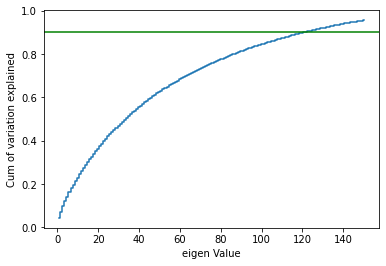

In [ ]:
plt.step(list(range(1,151)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.axhline(y=0.90, color='g', linestyle='-') 
plt.show()

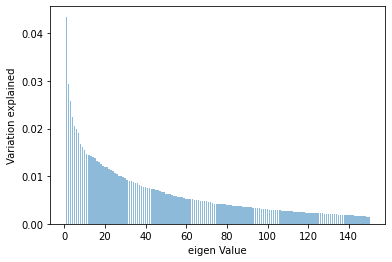

In [ ]:
plt.bar(list(range(1,151)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

From above plots we can consider 120 varibales explaining almost 90% variance

In [ ]:
pca1 = PCA(n_components=120)
pca1.fit(Scaled_X)
print(pca1.components_)
print(pca1.explained_variance_ratio_)
Xpca1 = pca1.transform(Scaled_X)

[[-0.05219755  0.00361672  0.02224399 ... -0.04685056  0.04360993
   0.07701331]
 [-0.00861531  0.01615979  0.04067772 ... -0.02702104 -0.09305659
  -0.08530185]
 [ 0.02592495  0.0076248   0.15619485 ... -0.06678111 -0.03581231
   0.03636594]
 ...
 [ 0.00150299 -0.15846433 -0.10101904 ... -0.08075977 -0.06672208
  -0.0166965 ]
 [-0.06253513 -0.01424825  0.02903508 ...  0.02559503  0.03014959
   0.03201181]
 [-0.07371828 -0.02736297 -0.0188127  ... -0.0424947  -0.06788781
   0.06313905]]
[0.04350768 0.02927152 0.02571429 0.02251092 0.0206314  0.01988001
 0.01907396 0.01676769 0.01615915 0.01560673 0.01471895 0.01455743
 0.0142284  0.01399144 0.01386461 0.01315477 0.01300133 0.01254789
 0.01209819 0.01194794 0.01184064 0.0114516  0.01130697 0.01103247
 0.01075978 0.01056427 0.01007899 0.01002646 0.00975358 0.00958878
 0.00912035 0.00897789 0.00890502 0.00878581 0.00866623 0.00860498
 0.00823832 0.00796339 0.00769318 0.0076573  0.00758154 0.00755315
 0.00736555 0.00728669 0.00718115 0.007

In [ ]:
Xpca1

array([[ 2.4926046 , -0.46700786, -3.19363819, ..., -0.63763048,
        -1.28000282, -0.40966974],
       [ 1.5481662 ,  0.50988637, -0.61459021, ...,  0.24862217,
        -0.66248816, -0.79375148],
       [-0.16970659, -0.11209897, -0.0612418 , ...,  0.7504512 ,
        -0.21980293,  0.0732332 ],
       ...,
       [ 0.9872973 , -3.00612625, -3.13525911, ..., -0.3396252 ,
        -0.26991279, -0.47678269],
       [ 0.9872973 , -3.00612625, -3.13525911, ..., -0.3396252 ,
        -0.26991279, -0.47678269],
       [ 4.65066096,  3.55582864,  2.51798491, ...,  0.40072867,
        -0.45750044,  0.59359218]])

**Training KNN model based on components out of PCA**

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split (Xpca1, y_res,  test_size= 0.20, random_state= 2)  


In [ ]:
knn_pca = KNeighborsClassifier(n_neighbors= 2, leaf_size= 1,  p= 1, weights = 'distance')
knn_pca.fit(X_train1, y_train1)
knn_pca_predic = knn_pca.predict(X_test1)

**E) Display and explain the classification report in detail**

In [ ]:
knn_pca_train = knn_pca.score(X_train1, y_train1)
knn_pca_train

1.0

In [ ]:
knn_pca_score = knn_pca.score(X_test1, y_test1)
knn_pca_score

0.9914675767918089

**We have got accuracy score of 100% on train data and almost 100% on test data as well after using PCA and using the data to build KNN model**

**F) Apply the above steps for all possible models that you have learnt so far.**

In [ ]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

### Logistic Regression model

In [107]:
logres_model = LogisticRegression()


In [109]:
logres_params = {'max_iter': [2000],      
                   'penalty': ['l1', 'l2'],
                   'solver': ['liblinear','newton-cg']}

logres_gs = GridSearchCV(logres_model, logres_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1).fit(X_train, y_train)
print(logres_gs.best_params_) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [113]:
from sklearn.pipeline import Pipeline

final_logres = LogisticRegression(max_iter = 2000, penalty= 'l1', solver= 'liblinear')

pipe = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components = 120)), ('model', final_logres)])
pipe.fit(X_train, y_train) # Using unscaled data since it will be scaled in the pipeline
logres_train_score = pipe.score(X_train, y_train) 
logres_train_score

0.8585470085470085

In [114]:
logres_score = pipe.score(X_test, y_test) 
logres_score

0.8071672354948806

SVM model

In [128]:
from sklearn import svm
svc = svm.SVC()

svc_params = {'kernel': ['rbf','poly','sigmoid'],
              'C' : [0.01, 0.1, 1, 10, 100, 1000 ],
              'gamma' : [1, 0.1, 0.001, 0.0001, 0.00001]}

svc_gs = GridSearchCV(svc, svc_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1).fit(X_train, y_train)
print(svc_gs.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [129]:
  svm = svm.SVC(C= 1, gamma= 1, kernel= 'rbf')

pipe_svc = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components = 120)), ('model', svm)])

pipe_svc.fit(X_train, y_train)
svc_train_score = pipe_svc.score(X_train, y_train)
svc_train_score

1.0

In [121]:
svc_score = pipe_svc.score(X_test, y_test)
svc_score

1.0

Decision Tree model

In [ ]:
params_dt = {'criterion': ['gini'],
             'max_depth': [3, 4, 5, 6, 7],
             'random_state': [0]}

model_dt = DecisionTreeClassifier()

dt_gs = GridSearchCV(model_dt, params_dt, cv=5).fit(X_train, y_train)
print(dt_gs.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'random_state': 0}


In [ ]:
final_dt = DecisionTreeClassifier(criterion = 'gini', random_state= 0, max_depth = 7 )

pipe_dt = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components = 120)), ('model', final_dt)])

pipe_dt.fit(X_train, y_train)
Decision_train_score = pipe_dt.score(X_train, y_train)
Decision_train_score

0.9188034188034188

In [ ]:
# DT test score
DecisionTree_score = pipe_dt.score(X_test, y_test)
DecisionTree_score

0.931740614334471

Random Forest Classifier Model

In [117]:
params_rf = {'n_estimators': [95, 100, 105],
             'criterion':['entropy'],
             'bootstrap': [True, False],
             'max_depth': [40, 45, 50],
             'max_features': [4, 5, 6],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [9, 10, 11],
             'random_state': [734]}
model_rf = RandomForestClassifier()
rf_gs = GridSearchCV(model_rf, params_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1).fit(X_train, y_train)
print(rf_gs.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 40, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 95, 'random_state': 734}


In [ ]:
final_rf = RandomForestClassifier(bootstrap= True, criterion= 'entropy', max_depth= 40,
                                        max_features= 4, min_samples_leaf= 1, min_samples_split=9,
                                                               n_estimators= 95, random_state= 734)

pipe_rf = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components = 120)), ('model', final_rf)])

pipe_rf.fit(X_train, y_train)
rf_train_score = pipe_rf.score(X_train, y_train)
rf_train_score

1.0

In [ ]:
## RF test score
randomForest_score = pipe_rf.score(X_test, y_test)
randomForest_score

1.0

Bagging Classifier

In [ ]:
 params_bc = {'n_estimators': [20, 30, 40, 50, 60],
             'random_state': [0]}
model_bc = BaggingClassifier()
bc_gs = GridSearchCV(model_bc, params_bc, cv=5).fit(X_train, y_train)
print(bc_gs.best_params_)

{'n_estimators': 20, 'random_state': 0}


In [ ]:
final_bc = BaggingClassifier(n_estimators= 30, random_state= 0)

pipe_bc = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components = 120)), ('model', final_bc)])

pipe_bc.fit(X_train, y_train)
bc_train_score = pipe_bc.score(X_train, y_train)
bc_train_score

0.9880341880341881

In [ ]:
# Bagging classifier test score
bagging_classifier_score = pipe_bc.score(X_test, y_test)
bagging_classifier_score

0.984641638225256

Gradient Boosting classifier

In [ ]:
params_gbc = {'n_estimators': [20, 30, 40, 50, 60],
             'random_state': [0]}
model_gbc = GradientBoostingClassifier()
gbc_gs = GridSearchCV(model_gbc, params_gbc, cv=5).fit(X_train, y_train)
print(gbc_gs.best_params_)

{'n_estimators': 60, 'random_state': 0}


In [ ]:
final_gbc = GradientBoostingClassifier(n_estimators= 60, random_state= 0)

pipe_gbc = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components = 120)), ('model', final_gbc)])

pipe_gbc.fit(X_train, y_train)
gbc_train_score = pipe_gbc.score(X_train, y_train)
gbc_train_score

0.9995726495726496

In [ ]:
#gbc test score
gbc_score = pipe_gbc.score(X_test, y_test)
gbc_score

0.9948805460750854

AdaBoostClassifier

In [ ]:
params_abc = {'n_estimators': [20, 30, 40, 50, 60],
             'random_state': [0]}
model_abc = AdaBoostClassifier()
abc_gs = GridSearchCV(model_abc, params_abc, cv=5).fit(X_train, y_train)
print(abc_gs.best_params_)

{'n_estimators': 60, 'random_state': 0}


In [ ]:
final_abc = AdaBoostClassifier(n_estimators= 60, random_state= 0)

pipe_abc = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components = 120)), ('model', final_abc)])

pipe_abc.fit(X_train, y_train)
AdaBoost_train_score = pipe_gbc.score(X_train, y_train)
AdaBoost_train_score

0.9995726495726496

In [ ]:
AdaBoost_score = pipe_gbc.score(X_test, y_test)
AdaBoost_score

0.9948805460750854

### **Post Training and Conclusion:**

A. Display and compare all the models designed with their train and test accuracies.

In [ ]:
Model_test_accuracy = pd.DataFrame([knn_pca_score,logres_score, svc_score, DecisionTree_score, randomForest_score, bagging_classifier_score, gbc_score,AdaBoost_score],
             index = ['KNN(after PCA)','Logistic Regression', 'SVM', 'Decision tree','Random Forest',
                      'Bagging Classifier', 'Gradient boosting classifier','AdaBoostClassifier' ], columns = ['Test Accuracy'])

Model_train_accuracy = pd.DataFrame([knn_pca_train,logres_train_score,svc_train_score,Decision_train_score,rf_train_score,bc_train_score,gbc_train_score,AdaBoost_train_score],
             index = ['KNN(after PCA)','Logistic Regression', 'SVM', 'Decision tree','Random Forest',
                      'Bagging Classifier', 'Gradient boosting classifier','AdaBoostClassifier' ], columns = ['Train Accuracy'])


accuracy_train_test = pd.merge(Model_train_accuracy, Model_test_accuracy, on=Model_train_accuracy.index, how='outer')

accuracy_train_test

key_0  Train Accuracy  Test Accuracy
0                KNN(after PCA)        1.000000       0.991468
1           Logistic Regression        0.838034       0.798635
2                           SVM        1.000000       1.000000
3                 Decision tree        0.918803       0.931741
4                 Random Forest        1.000000       1.000000
5            Bagging Classifier        0.988034       0.984642
6  Gradient boosting classifier        0.999573       0.994881
7            AdaBoostClassifier        0.999573       0.994881

### **B) Select the final best trained model along with your detailed comments for selecting this model.**

-We have 100% accuracy on train and test for both SVM and Rnadom forest models.

Choosing Rnadom forest as best trained Model based since the hyperparamters were selected after Fitting 5 folds for each of 486 candidates, totalling 2430 fits.
### C. Pickle the selected model for future use

In [ ]:
import pickle

with open('best_model_randomforest_classifier', 'wb') as files:  #Answer   # Adding the best model classifier to a pickle file in write mode
    pickle.dump(pipe_rf, files)

In [ ]:
with open('best_model_randomforest_classifier' , 'rb') as files:   # Opening the best model classifier in read mode
    ab = pickle.load(files)

ab

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=120)),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=40,
                                        max_features=4, min_samples_split=9,
                                        n_estimators=95, random_state=734))])

**D. Write your conclusion on the results.**

**The accuracy on train and test for all the models was good however Random forest model and SVM model were best with 100% accuracy on both train and test data. The best model chosen is Random forest classifier since the accuracy scorea are using paramters sslected after extensive hyperparamter tuning and PCA**